# **`cruw-devkit` Usages for ROD2021 Challenge**

This is a simple tutorial of `cruw-devkit` for the [ROD2021 Challenge](https://www.cruwdataset.org/rod2021). Please find the source code at https://github.com/yizhou-wang/cruw-devkit.

The tutorial is written by [Yizhou Wang](http://yizhouwang.net/).

## CRUW Dataset Object

The CRUW dataset object includes the sensor configurations, calibration parameters, object configurations, and coordinate mappings.

In [1]:
from cruw import CRUW
data_root='/mnt/disk1/CRUW/ROD2021'

#### ROD2021 Dataset File Structure

We put the data files as the following structure.

```
data_root
  - sequences
  | - train
  | | - <SEQ_NAME>
  | | | - IMAGES_0
  | | | | - <FRAME_ID>.jpg
  | | | | - ***.jpg
  | | | - RADAR_RA_H
  | | |   - <FRAME_ID>_<CHIRP_ID>.npy
  | | |   - ***.npy
  | | - ***
  | | 
  | - test
  |   - <SEQ_NAME>
  |   | - RADAR_RA_H
  |   |   - <FRAME_ID>_<CHIRP_ID>.npy
  |   |   - ***.npy
  |   - ***
  | 
  - annotations
    - train
    | - <SEQ_NAME>.txt
    | - ***.txt
    - test
      - <SEQ_NAME>.txt
      - ***.txt
```

In [2]:
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config_rod2021')
print(dataset)

<CRUW Dataset Object>
Dataset name:   ROD2021
Sensor configs: camera = True  | radar = True 
Calibration:    camera = False | cross = True 
Object configs: n_class = 3
Coor mappings:  True



### Camera and radar configurations

In [3]:
print(dataset.sensor_cfg.camera_cfg)

{'image_width': 1440, 'image_height': 864, 'frame_rate': 30, 'image_folder': 'IMAGES_0', 'ext': 'jpg'}


In [4]:
print(dataset.sensor_cfg.radar_cfg)

{'ramap_rsize': 128, 'ramap_asize': 128, 'frame_rate': 30, 'crop_num': 3, 'n_chirps': 255, 'chirp_ids': [0, 64, 128, 192], 'sample_freq': 4000000.0, 'sweep_slope': 21001700000000.0, 'data_type': 'ROD2021', 'chirp_folder': 'RADAR_RA_H', 'ext': 'npy', 'ramap_rsize_label': 122, 'ramap_asize_label': 121, 'ra_min_label': -60, 'ra_max_label': 60, 'rr_min': 1.0, 'rr_max': 25.0, 'ra_min': -90, 'ra_max': 90}


### Calibration parameters (Camera intrinsics are not available for ROD2021)

In [5]:
print(dataset.sensor_cfg.calib_cfg)

{'cam_calib_paths': {}, 't_cl2cr': [0.35, 0.0, 0.0], 't_cl2rh': [0.11, -0.05, 0.06], 't_cl2rv': [0.21, -0.05, 0.06], 'cam_calib': {'load_success': True}}


### Object classes of interest

In [6]:
print(dataset.object_cfg.classes)

['pedestrian', 'cyclist', 'car']


### Mapping between range/azimuth and the indices in RF images

In [7]:
from cruw.mapping import ra2idx, idx2ra
import math

Map from absolute range (m) and azimuth (rad) to RF indices.

In [8]:
rng = 5.0
azm = math.radians(30)  # degree to radians
rid, aid = ra2idx(rng, azm, dataset.range_grid, dataset.angle_grid)
print(rid, aid)

20 95


Map from RF indices to absolute range (m) and azimuth (rad).

In [9]:
rid = 20
aid = 95
rng, azm = idx2ra(rid, aid, dataset.range_grid, dataset.angle_grid)
print(rng, math.degrees(azm))

4.900261829550543 29.739869694145295


Note: The range and azimuth cannot be absolutely recover due to the discretization from absolute range/azimuth values to RF pixels.

## Data Visualization

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

from cruw.visualization.examples import show_dataset_rod2021

def get_paths(seq_name, frame_id):
    image_path = os.path.join(data_root, 'sequences', 'train', seq_name, 
                              dataset.sensor_cfg.camera_cfg['image_folder'], 
                              '%010d.jpg' % frame_id)
    chirp_path = os.path.join(data_root, 'sequences', 'train', seq_name, 
                              dataset.sensor_cfg.radar_cfg['chirp_folder'],
                              '%06d_0000.npy' % frame_id)
    anno_path = os.path.join(data_root, 'annotations', 'train', seq_name + '.txt')
    return image_path, chirp_path, anno_path

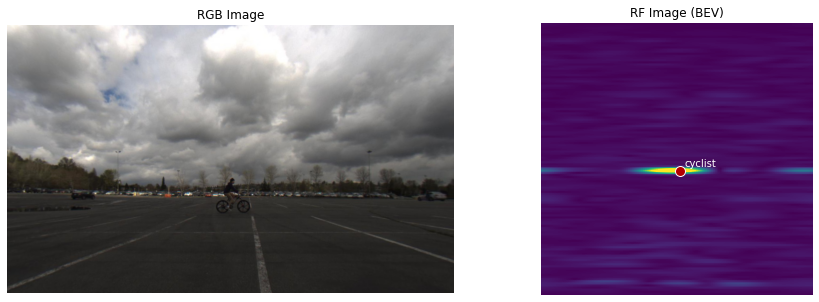

In [11]:
seq_name = '2019_04_09_BMS1000'
frame_id = 400
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

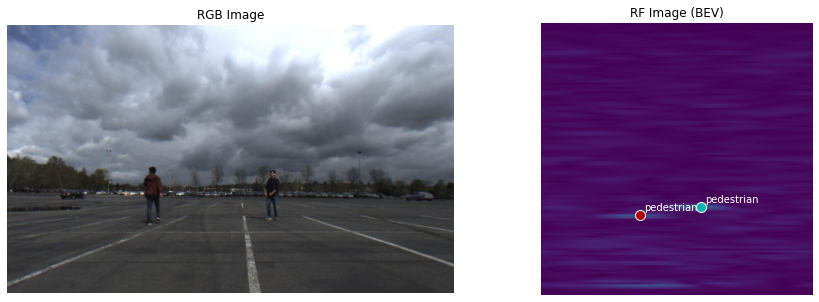

In [12]:
seq_name = '2019_04_09_PMS3000'
frame_id = 200
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

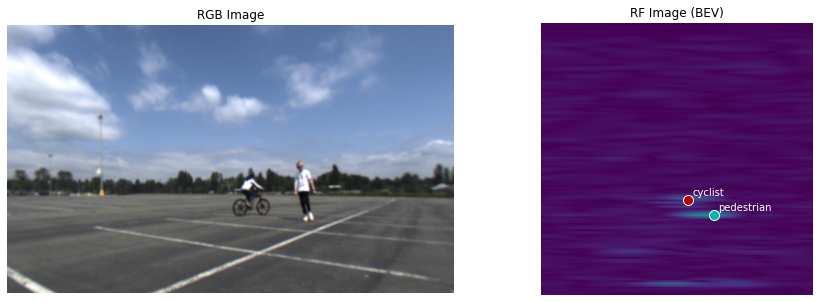

In [13]:
seq_name = '2019_05_29_PBMS007'
frame_id = 300
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

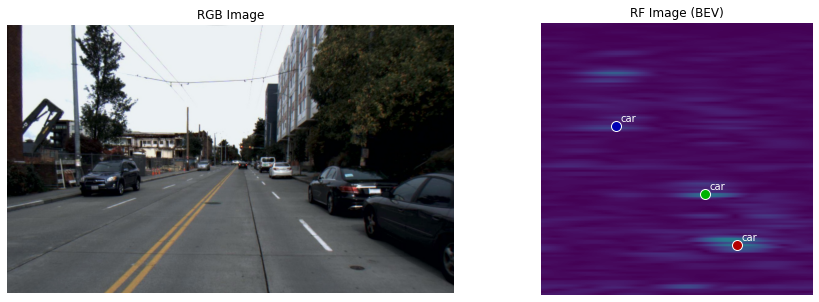

In [14]:
seq_name = '2019_09_29_ONRD001'
frame_id = 834
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

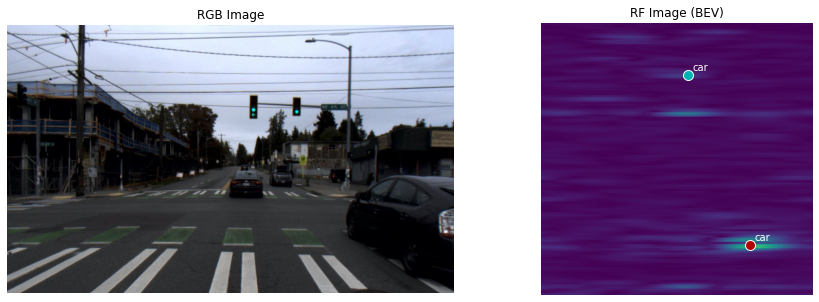

In [15]:
seq_name = '2019_09_29_ONRD002'
frame_id = 900
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

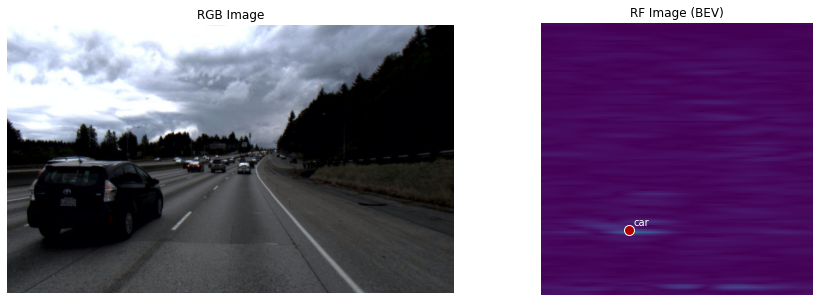

In [16]:
seq_name = '2019_09_29_ONRD011'
frame_id = 1000
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

## Evaluation Script

An example for the usage of evaluation tool used in the ROD2021 Challenge is shown below.

In [17]:
from cruw.eval import evaluate_rod2021

submit_dir = '<SUBMISSION_DIR>'
truth_dir = '<ANNOTATION_DIR>'
evaluate_rod2021(submit_dir, truth_dir, dataset)

AP_total: 63.3184
AR_total: 74.3981
